In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [3]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [16]:
x=dataset[["Age","EstimatedSalary"]]
y=dataset["Purchased"]

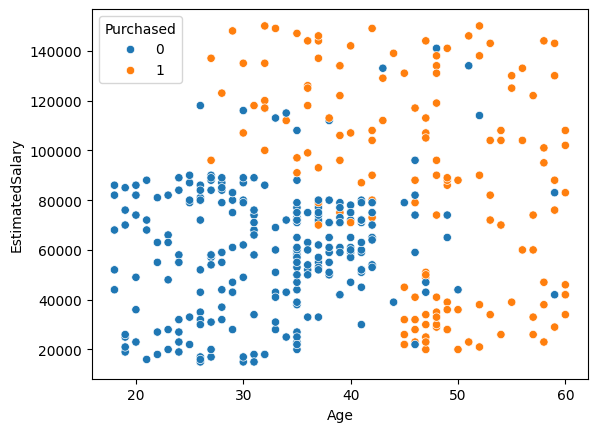

In [17]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
knn.score(x_test,y_test)*100

92.5

In [26]:
knn.score(x_train,y_train)*100

90.9375

In [29]:
 for i in range(1,10):
     knn1=KNeighborsClassifier(n_neighbors=i)
     knn1.fit(x_train,y_train)
     print(i,knn1.score(x_train,y_train),knn1.score(x_test,y_test))

1 0.996875 0.85
2 0.915625 0.8625
3 0.925 0.9125
4 0.91875 0.925
5 0.909375 0.925
6 0.909375 0.9
7 0.91875 0.9375
8 0.90625 0.925
9 0.9125 0.9375


In [30]:
knn.predict([[19,19000]])

C:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [31]:
from mlxtend.plotting import plot_decision_regions

C:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


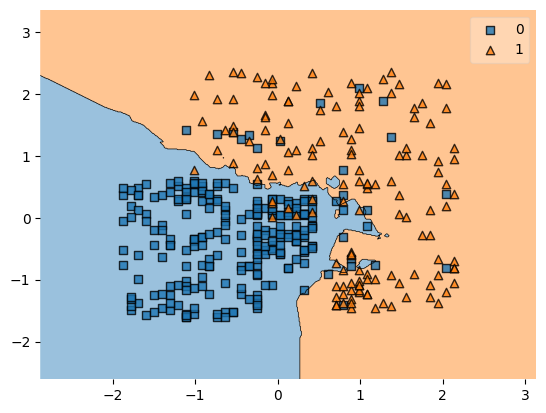

In [33]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()